In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import warnings 
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('/Users/krishnapeddibhotla/Downloads/AmazonReview.csv')

In [9]:
# Printing shape of the dataset 
print(data.shape) 

(25000, 2)


In [10]:
# printing columns and rows information 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [11]:
# looking for NULL values 
print("Null Values:\n", data.isna().sum()) 

Null Values:
 Review       1
Sentiment    0
dtype: int64


In [12]:
# dropping null values 
data = data.dropna() 

In [13]:
# again checking for NULL values 
print("Null Values after dropping:\n", data.isna().sum())

Null Values after dropping:
 Review       0
Sentiment    0
dtype: int64


In [14]:
# count of unique values in Sentiment column 
data['Sentiment'].value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    4999
Name: count, dtype: int64

In [24]:
# downloading stopwords from nltk library 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 
  
# Review text Cleaning 
def Clean_reviews(text):
    
    # removing html brackets and other square brackets from the string
    regex = re.compile('<.*?>')
    text = re.sub(regex, '', text)
    
    # removing special characters like @, #, $, etc 
    pattern = re.compile('[^a-zA-z0-9\s]') 
    text = re.sub(pattern,'',text) 
  
    # removing numbers 
    pattern = re.compile('\d+') 
    text = re.sub(pattern,'',text) 
  
    # converting text to lower case 
    text = text.lower() 
      
    # Tokenization of words 
    text = word_tokenize(text) 
      
    # Stop words removal 
    text = [word for word in text if not word in stop_words] 
      
    return text 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishnapeddibhotla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# using the clean_reviews function on the dataset 
data['Review'] = data['Review'].apply(Clean_reviews)

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

# Assuming `data` is your DataFrame with a 'Review' column and a 'Sentiment' column

# Initialize the tokenizer
tokenizer = Tokenizer()

# Converting all the reviews to a list
reviews_to_list = data['Review'].tolist()

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(reviews_to_list)

# Generate text sequences
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

# Set the maximum words we want in an example (padding length)
max_words = 500

# Pad sequences to ensure uniform length
X = pad_sequences(text_sequences, maxlen=max_words)

# One-hot encode the 'Sentiment' column
data = pd.get_dummies(data, columns=['Sentiment'])

# Set the target variables (y)
y = data[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4', 'Sentiment_5']]

# Convert y to a NumPy array
y = y.values

# Print the shapes of X and y
print(X.shape, y.shape)

(24999, 500) (24999, 5)


In [32]:
# Train Test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19999, 500) (5000, 500) (19999, 5) (5000, 5)


In [33]:
# Creating a RNN model 
rnn = Sequential(name="Simple_RNN") 
rnn.add(Embedding(len(tokenizer.word_index)+1, max_words, input_length=max_words)) 
rnn.add(SimpleRNN(128,activation='relu',return_sequences=True)) 
rnn.add(SimpleRNN(64,activation='relu',return_sequences=False)) 
rnn.add(Dense(5, activation='softmax')) 
# printing model summary 
print(rnn.summary())

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 500)          19819500  
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          80512     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 19912689 (75.96 MB)
Trainable params: 19912689 (75.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [34]:
# Compiling model 
rnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy']) 

# Training the model 
history = rnn.fit(X_train, y_train, batch_size=64, epochs=2, verbose=1, validation_data = (X_test, y_test)) 

# Printing model score on test data 
print("Simple_RNN Score---> ", rnn.evaluate(X_test, y_test, verbose=1))

Epoch 1/2
313/313 [==============================] - 147s 467ms/step - loss: 1.3842 - accuracy: 0.3732 - val_loss: 1.2707 - val_accuracy: 0.4384
Epoch 2/2
157/157 [==============================] - 14s 91ms/step - loss: 1.3189 - accuracy: 0.4240
Simple_RNN Score--->  [1.318878173828125, 0.42399999499320984]


In [35]:
model = Sequential(name="LSTM_Model") 
model.add(Embedding(len(tokenizer.word_index)+1, max_words, input_length=max_words)) 

# adding a LSTM layer 
model.add(LSTM(150, return_sequences=False)) 
BatchNormalization() 
model.add(Dropout(0.5)) 

#adding a dense layer with activation function of relu 
model.add(Dense(50, activation='relu')) 
BatchNormalization() 
model.add(Dropout(0.5)) 

# adding the final output activation with activation function of softmax 
model.add(Dense(5, activation='softmax')) 

# printing model summary 
print(model.summary())

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 500)          19819500  
                                                                 
 lstm (LSTM)                 (None, 150)               390600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                7550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 20217905 (77.13 MB)
Trainable params: 2021

In [36]:
# Compiling the model 
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'] ) 

# Training the GRU model 
history = model.fit(X_train, y_train, batch_size=64, epochs=3, verbose=1, validation_data=(X_test, y_test)) 

# Printing model score on test data 
print("LSTM model Score---> ", model.evaluate(X_test, y_test, verbose=1))

Epoch 1/3
313/313 [==============================] - 296s 940ms/step - loss: 1.3721 - accuracy: 0.3835 - val_loss: 1.2142 - val_accuracy: 0.4752
Epoch 2/3
313/313 [==============================] - 368s 1s/step - loss: 1.1029 - accuracy: 0.5311 - val_loss: 1.2512 - val_accuracy: 0.4618
Epoch 3/3
157/157 [==============================] - 23s 145ms/step - loss: 1.3624 - accuracy: 0.4490
LSTM model Score--->  [1.3624300956726074, 0.4490000009536743]


Text(0, 0.5, 'Accuracy')

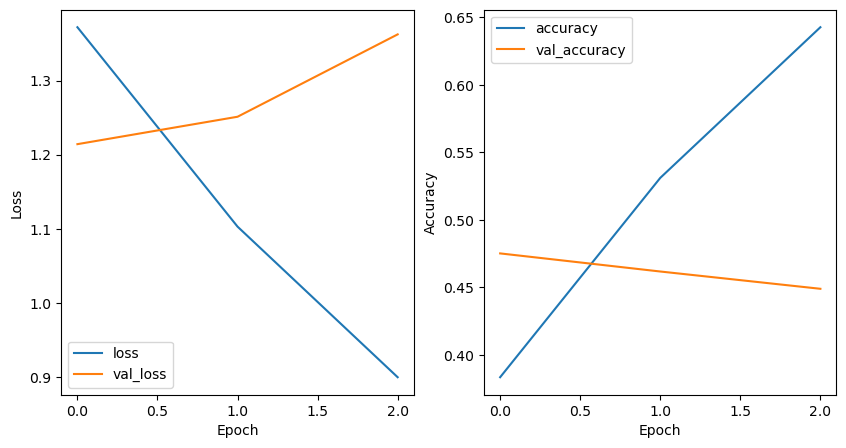

In [37]:
# Plotting the history 
metrics = history.history 
plt.figure(figsize=(10, 5)) 

# Plotting training and validation loss 
plt.subplot(1, 2, 1) 
plt.plot(history.epoch, metrics['loss'], metrics['val_loss']) 
plt.legend(['loss', 'val_loss']) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 

# Plotting training and validation accuracy 
plt.subplot(1, 2, 2) 
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy']) 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')

y_true shape: (5000,)
157/157 [==============================] - 23s 143ms/step


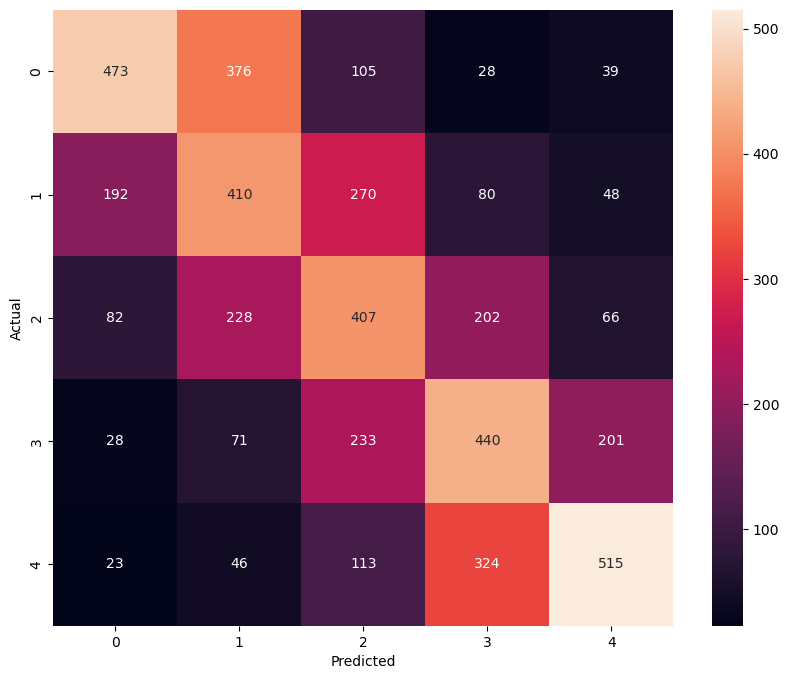

In [39]:
# converting y_test tht was one hot encoded to one column fo rconfusion matrix 
y_true = np.argmax(y_test, axis=1)
print("y_true shape:", y_true.shape)

# Predicting the labels for X_test and converting to single column
y_pred = np.argmax(model.predict(X_test), axis=1)

# Creating the confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
from sklearn.metrics import classification_report 
report = classification_report(y_true, y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.59      0.46      0.52      1021
           1       0.36      0.41      0.38      1000
           2       0.36      0.41      0.39       985
           3       0.41      0.45      0.43       973
           4       0.59      0.50      0.54      1021

    accuracy                           0.45      5000
   macro avg       0.46      0.45      0.45      5000
weighted avg       0.47      0.45      0.45      5000



In [42]:
def predict_review_rating(text):
    # Convert the input text to sequences using the fitted tokenizer
    text_sequences_test = tokenizer.texts_to_sequences([text])
    
    # Pad the sequences to ensure they are of the same length as used during training
    testing = pad_sequences(text_sequences_test, maxlen=max_words)
    
    # Predict the class (rating - 1) using the model
    y_pred_test = np.argmax(model.predict(testing), axis=1)
    
    # Return the rating by adding 1 to the predicted class
    return y_pred_test[0] + 1

# Testing the function
rating1 = predict_review_rating('Worst product')
print("The rating according to the review is:", rating1)

rating2 = predict_review_rating('Awesome product, I will recommend this to other users.')
print("The rating according to the review is:", rating2)

1/1 [==============================] - 0s 88ms/step
The rating according to the review is: 1
1/1 [==============================] - 0s 35ms/step
The rating according to the review is: 5
